In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [7]:
df = pd.read_excel('test_data.xlsx')

In [8]:
df

,Unnamed: 0,name,title,time,year_of_birth,description,link,text,sentiment?,names_list,name_matching_score,nationality_matching_score,gender_matching_score,age_matching_score,ground_confidence
0,0.0,Chia Teck Leng,Guilty As Charged: Chia Teck Leng led a double...,64 months ago,56.0,Asia Pacific Breweries executive Chia Teck Len...,https://www.straitstimes.com/singapore/courts-...,This story was first published in July 2015 in...,"{'neg': 0.453, 'neu': 0.495, 'pos': 0.052, 'co...","Counter({'Chia': 10, 'Chia Teck Leng': 4, 'Li ...",100,1.0,0.901961,0,1
1,3.0,Chia Teck Leng,Guilty As Charged: Shocking crimes that have s...,64 months ago,56.0,Chia Teck Leng secretly led a double life as a...,https://www.straitstimes.com/singapore/courts-...,The following stories were first published in ...,"{'neg': 0.47, 'neu': 0.498, 'pos': 0.031, 'com...","Counter({'Chia Teck Leng': 3, 'Weng Wah': 3, '...",100,1.0,0.400000,0,1
2,6.0,Chia Teck Leng,Accountant who embezzled $40m a compulsive gam...,27 months ago,59.0,While Ewe did not amass riches from his crimes...,https://www.straitstimes.com/singapore/courts-...,SINGAPORE - Certified public accountant Ewe Pa...,"{'neg': 0.322, 'neu': 0.648, 'pos': 0.03, 'com...","Counter({'Ewe': 3, 'Chia Teck Leng': 2, 'Khoo'...",100,1.0,0.000000,0,1
3,9.0,Chia Teck Leng,John Soh could face longest-ever jail term for...,54 months ago,57.0,"SINGAPORE (March 3): Chia Teck Leng, a former ...",https://www.theedgemarkets.com/article/john-so...,"SINGAPORE (March 3): Chia Teck Leng, a former ...","{'neg': 0.519, 'neu': 0.464, 'pos': 0.017, 'co...","Counter({'Soh': 5, 'Chia': 3, 'Chia Teck Leng'...",100,1.0,0.000000,0,1
4,12.0,Chia Teck Leng,"Sherlock Holmes of Shenton Way, Brunch - THE B...",38 months ago,58.0,PwC forensics leader Chan Kheng Tek adds that ...,https://www.businesstimes.com.sg/brunch/sherlo...,NaN,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...","Counter({'Chan Kheng': 1, 'Chia Teck Leng': 1})",100,0.0,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,1.0,1.000000,1,1
170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,1.0,1.000000,1,1
171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,1.0,1.000000,1,1
172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,1.0,1.000000,1,1


In [9]:
df = df[['name_matching_score','nationality_matching_score','gender_matching_score','age_matching_score','ground_confidence']]

In [10]:
df[(df['gender_matching_score'] == 1) & (df['ground_confidence'] == 0)]

,name_matching_score,nationality_matching_score,gender_matching_score,age_matching_score,ground_confidence


In [11]:
feature_cols = ['name_matching_score','nationality_matching_score','gender_matching_score','age_matching_score']
X = df[feature_cols]

y = df.ground_confidence

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=555)

In [13]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

In [14]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[11,  2],
       [ 0, 31]])

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 257.44, 'Predicted label')

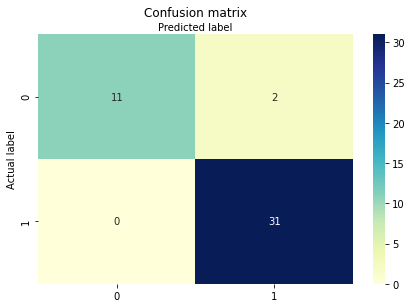

In [16]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
logreg

LogisticRegression()

In [18]:
import statsmodels.api as sm
from statsmodels.tools import add_constant
X = add_constant(X)
logit_model=sm.Logit(y,X)
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.153062
         Iterations 12


In [19]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:      ground_confidence   No. Observations:                  174
Model:                          Logit   Df Residuals:                      169
Method:                           MLE   Df Model:                            4
Date:                Tue, 28 Sep 2021   Pseudo R-squ.:                  0.7610
Time:                        14:46:24   Log-Likelihood:                -26.633
converged:                       True   LL-Null:                       -111.43
Covariance Type:            nonrobust   LLR p-value:                 1.273e-35
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -11.6046     12.052     -0.963      0.336     -35.227      12.018
name_matching_score            0.1340      0.122      1.101      0.271      -0.104 

## Can see here that the p value at 5% confidence level, nationality, gender, age are not statistically significant.

In [20]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train,y_train)

y_pred=linreg.predict(X_test)

In [21]:
print(linreg.coef_)

[ 0.00858862  0.09551699  0.12069721 -0.09300325]


In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rf = RandomForestRegressor(random_state = 4)

In [24]:
rfmodel = rf.fit(X_train,y_train)

In [27]:
y_pred_r = rfmodel.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

## MSE for random forest

In [31]:
mae_r = mean_absolute_error(y_test,y_pred_r)
mse_r = mean_squared_error(y_test,y_pred_r)
print(f"MAE: {mae_r}, MSE: {mse_r}")

MAE: 0.08001119038293147, MSE: 0.04674947896185012


## MSE for linear regression

In [32]:
mae_r = mean_absolute_error(y_test,y_pred)
mse_r = mean_squared_error(y_test,y_pred)
print(f"MAE: {mae_r}, MSE: {mse_r}")

MAE: 0.09538708582932003, MSE: 0.044901980307159355


In [192]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)#,booster='gblinear')

In [193]:
xg_reg.fit(X_train,y_train)

y_pred_x = xg_reg.predict(X_test)

[16:21:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [194]:
mae_r = mean_absolute_error(y_test,y_pred_x)
mse_r = mean_squared_error(y_test,y_pred_x)
print(f"MAE: {mae_r}, MSE: {mse_r}")

MAE: 0.38607190413908526, MSE: 0.15438034790603036


## XGBoost coefficients

In [195]:
print(xg_reg.coef_)


AttributeError: Coefficients are not defined for Booster type None

## XGBoost importance

In [198]:
xgb_impt = xg_reg.feature_importances_
xgb_impt

array([0.5037822 , 0.30330628, 0.11020401, 0.08270755], dtype=float32)

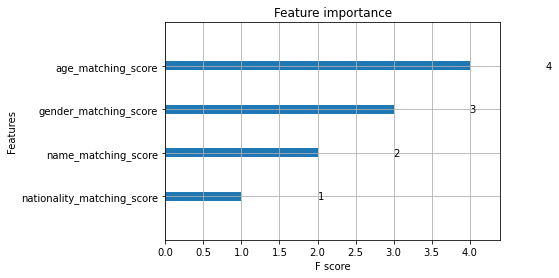

In [197]:
xgb.plot_importance(xg_reg)

## Randomforest feature importance

In [72]:
rfmodel.feature_importances_

array([0.90709987, 0.04997348, 0.03029292, 0.01263373])

In [73]:
importance = rfmodel.feature_importances_

In [74]:
columns = X_train.columns

In [75]:
rfGraph = pd.Series(importance,columns)

Text(0.5, 0, 'Feature importance')

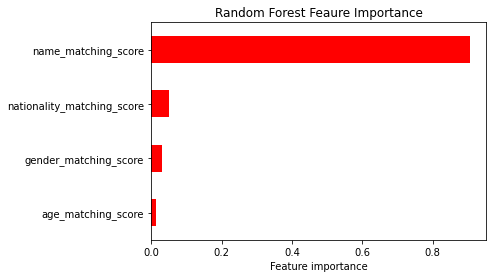

In [81]:
#figure(figsize(10,10))
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i])

rfGraph.sort_values().plot.barh(color = "red")
plt.title("Random Forest Feaure Importance")
plt.xlabel("Feature importance")
#addlabels(columns,importance)

In [82]:
rfGraph

name_matching_score           0.907100
nationality_matching_score    0.049973
gender_matching_score         0.030293
age_matching_score            0.012634
dtype: float64

In [95]:
df['confidence score'] = (df['name_matching_score'] * 0.907100/100 + df['nationality_matching_score'] *0.049973 + df['gender_matching_score'] * 0.030293 + df['age_matching_score']* 0.012634)



<ipython-input-95-4e21b216c705>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['confidence score'] = (df['name_matching_score'] * 0.907100/100 + df['nationality_matching_score'] *0.049973 + df['gender_matching_score'] * 0.030293 + df['age_matching_score']* 0.012634)


In [96]:
df.head(10)

,name_matching_score,nationality_matching_score,gender_matching_score,age_matching_score,ground_confidence,confidence score
0,100,1.0,0.901961,0,1,0.984396
1,100,1.0,0.400000,0,1,0.969190
2,100,1.0,0.000000,0,1,0.957073
3,100,1.0,0.000000,0,1,0.957073
4,100,0.0,0.000000,0,1,0.907100
5,100,1.0,0.000000,0,0,0.957073
6,100,1.0,1.000000,1,1,1.000000
7,100,1.0,0.000000,1,1,0.969707
8,100,1.0,1.000000,1,1,1.000000
9,100,0.0,1.000000,1,1,0.950027


In [103]:
len(df[(df['confidence score'] > 0.95) & (df['ground_confidence'] ==0)])

2

In [109]:
print(f"Model Accuracy is {accuracy*100}%")

Model Accuracy is 47.701149425287355%


In [201]:
df.head(10)

,name_matching_score,nationality_matching_score,gender_matching_score,age_matching_score,ground_confidence,confidence score
0,100,1.0,0.901961,0,1,0.984396
1,100,1.0,0.400000,0,1,0.969190
2,100,1.0,0.000000,0,1,0.957073
3,100,1.0,0.000000,0,1,0.957073
4,100,0.0,0.000000,0,1,0.907100
5,100,1.0,0.000000,0,0,0.957073
6,100,1.0,1.000000,1,1,1.000000
7,100,1.0,0.000000,1,1,0.969707
8,100,1.0,1.000000,1,1,1.000000
9,100,0.0,1.000000,1,1,0.950027


In [152]:
true_positive = len(df[(df['confidence score'] > 0.95) & (df['ground_confidence'] ==1)])
false_positive = len(df[(df['confidence score'] < 0.95) & (df['ground_confidence'] ==1)])
true_negative = len(df[(df['confidence score'] < 0.95) & (df['ground_confidence'] ==0)])
false_negative = len(df[(df['confidence score'] > 0.95) & (df['ground_confidence'] ==0)])

In [153]:
accuracy = (true_positive + true_negative +false_negative)/ len(df) 

In [154]:
print(f"Model Accuracy is {accuracy*100}%")

Model Accuracy is 81.60919540229885%


In [151]:
df[(df['confidence score'] > 0.95) & (df['ground_confidence'] ==0)]

,name_matching_score,nationality_matching_score,gender_matching_score,age_matching_score,ground_confidence,confidence score
5,100,1.0,0.0,0,0,0.957073
78,100,1.0,0.0,1,0,0.969707


## Threshold of 0.9 False Positive Rate

In [168]:
ninety = len(df[(df['confidence score'] > 0.90) & (df['ground_confidence'] ==0)]) * 100/len(df)

print(f"With a threshold of 0.9, false positive rate is {ninety}%")

With a threshold of 0.9, false positive rate is 4.597701149425287%


In [171]:
ninetyfive = len(df[(df['confidence score'] > 0.95) & (df['ground_confidence'] ==0)]) * 100/len(df)
print(f"With a threshold of 0.95, false positive rate is {ninetyfive}%")

With a threshold of 0.95, false positive rate is 1.1494252873563218%


In [170]:
print(f"The difference in false positive rate is {ninety-ninetyfive}%")

The difference in false positive rate is 3.4482758620689653%
